## Biweekly Report
# Thoon Nguyen
### First Deep Learning Model/ Learning Tensorflow

For my biweekly report, I am writing about my process of learning tensorflow. I will be using the Iris data set and creating a model for classification of the type of Iris in the data set. This report will mostly deal with segments of the code and how they fit together to create the model.


### Import Libraries and Load the Iris Data


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert target labels to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=22)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


For this block of code, I learned about OneHotEncoder and fit_transform.
In the Iris dataset from sklearn, the category for type is already encodeded numerically as (0,1,2). From fit_transfrom, we changes this data into a binary array as\
0 -> [1,0,0]\
1 -> [0,1,0]\
2 -> [0,0,1]\
This is beneficial as it removes the ordinal relationship in the categorical data, which might imply 1 is better than 2 for example.



Step 2: Build the Nueral Network

In [7]:
# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The learning model I will be using is a sequential model, which is a feed forward neural network. This model was chosen as it works well with tabular data such as the iris data set. In this model, the data flows in one direction, one one layer to the next. In the Sequential model, from the `keras` package, we can build each layer of the model. The number of layers, type of layers, number of nodes, and activation type are all hyperparameters.  
**Number of layers:**    
In this code, we have 3 layers, an input layer, a hidden layer, and an output layer. You can choose the amount of layers depending on how complex the data is. The Iris data set is small and simple so 2-3 layers should be sufficient.  
**Type of layers:**   
A `dense` layer is where each nueron in a layer is connected to every nueron in the previous.    
**Activation**  
In each layer, the activation function is applied to the output of each nueron before it is passed to the next layer.
In this model `relu` (rectified linear unit) is used to introduce non-linearity to the network, allowing it to model complex relationships.   
the activation `softmax` converts the final output into a percentage.

Next I will go over the compiling of the model. The three arguments used are `optimizer`, `loss`, and `metric`.    
**Optimizer**    
Here we can chose the type of optimizer we want to use in our model. `adam` was chosen was this model because the dataset is small and Adam converges quickly without requiring too much tuning of hyperparamters (i.e. it is easy to use). Adam stands for Adaptive Moment Estimation which combines the idea of adative learning rates from RMSProp and stochastic gradient descent with momentum. Other gradient descent could have been chosen, such as `sgd` (Stochastic Gradient Descent) or `adagrad` and in future reports, I may explore how different optimizers effect the results and performance of the model.    
**Loss**    
Here I used `categorical_crossentrophy`. This was chosen because the task involved was a multi-class classification problem. How it works is that it penalizings incorrect classification more heavily if the model is confident about an incorrect prediction.    
**Metrics**    
The metric is used to evaluate the model's performance during training and testing.`Accuracy` is a basic and easy to understand metric. Similar to the loss function, these are hyperparameters we can choose based on what we are modeling.


### Step 3: Train the model

In [10]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=8,
                    validation_split=0.2,
                    verbose=0)


This block of codes deals with training and validation. The `fit()` method in this code trains the model on the Iris dataset by processing the training data (X_train and y_train) over 50 epochs. The model uses a batch size of 8, meaning it updates weights after processing 8 samples at a time. 20% of the data is reserved for validation during training, allowing the model's performance on unseen data to be monitored. The verbose=1 setting provides progress bars and metrics (like accuracy and loss) during training. The history object stores these metrics, which can later be used to analyze the model's performance over time.

### Step 4: Evaluate the Model

In [13]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions (optional)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)


Test Loss: 0.25
Test Accuracy: 0.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted classes: [0 2 1 2 1 1 1 2 1 0 2 1 2 2 0 1 1 1 1 1 0 2 0 1 2 0 2 2 2 2]
True classes: [0 2 1 2 1 1 1 2 1 0 2 1 2 2 0 2 1 1 2 1 0 2 0 1 2 0 2 2 2 2]


### Step 5: Visualize Training Process (Optional)

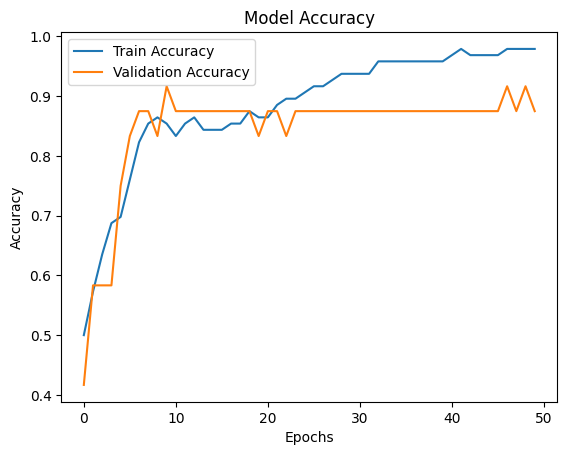

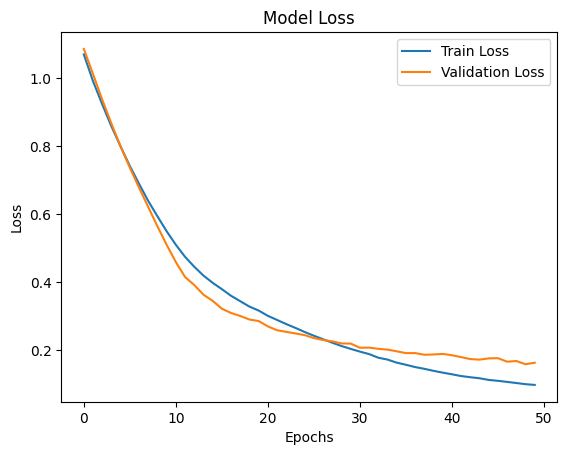

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Here we see our model's perfromance on the training data versus validation data. In the validation data there is a plateau while accuracy increase in the training data. Also loss rate increases in validation as loss rate decreases in training. Both of these are indicative of over fitting the data.

### Conclusion ###
I felt this exercise was very benefical for learning the basics of tensorflow and deep learning. While the data set was small and the task was simple (classification of 3 types), I learned alot about the basics of coding with tensorflow. In future reports, I hope to use what I learn here to create models for other tasks such as image recognition or large langauge model.